In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, beta, uniform
from math import comb
import pymc3 as pm
import arviz as az

## Problem 10.14 parts i - iv

In [10]:
def prob_10_4(data, n=1000):
    
    with pm.Model() as bern_model:
        theta = pm.Beta('theta', alpha=1., beta=1.)
        y = pm.Bernoulli('y', p=theta, observed=data)
        trace = pm.sample(n)
        
        theta = trace['theta']
        mean = theta.mean()
        median = np.median(theta)
        var = theta.var()
        az.plot_posterior(trace)
        
    with bern_model:
        az.plot_trace(trace)
        
    return (mean, median, var)

/var/folders/lj/bn7k_d612h70yjqxkxbdx9nr0000gp/T/ipykernel_10385/3013834621.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


Mean:  0.22883467637562374
Median:  0.22165547294650556
Variance:  0.0074247961719708915


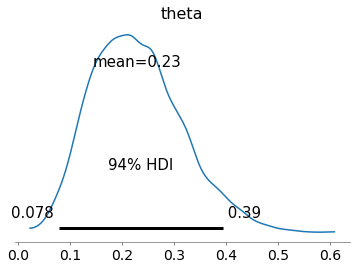

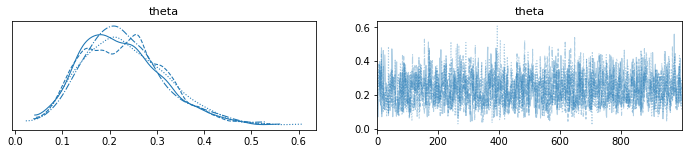

In [11]:
data = bernoulli.rvs(0.3, size=20)

mean, median, var = prob_10_4(data)

print("Mean: ", mean)
print("Median: ", median)
print("Variance: ", var)

## part v.

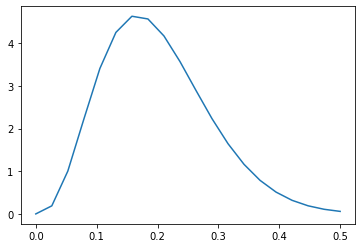

In [49]:
#true beta dist for part v
data = bernoulli.rvs(0.3, size=20)
n =20
a = np.sum(data)
b = n - a
x = np.linspace(0, 0.5, n)

plt.plot(x, beta.pdf(x, a, b))

## Problem 10.15 parts i - iv

In [50]:
def prob10_5(x, y, n=2000):
    with pm.Model() as model:
        a = pm.Normal('a', mu=0, sd=10)
        b = pm.Normal('b', mu=0, sd=1)
        sigma = pm.HalfCauchy('sigma', 5)

        mu = a + b * x
        y_pred = pm.Normal('y_pred', mu=mu, sd=sigma, observed=y)
        
        trace = pm.sample(n, tune=1000)
        
        a = trace['a']
        b = trace['b']
        sigma = trace['sigma']
        
        mean_a = a.mean()
        mean_b = b.mean()
        mean_sig = sigma.mean()
        
        
        with model:
            az.plot_trace(trace)
    return (mean_a, mean_b, mean_sig, np.random.choice(a, size=200), np.random.choice(b, size=200))  

/var/folders/lj/bn7k_d612h70yjqxkxbdx9nr0000gp/T/ipykernel_10385/1977816666.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


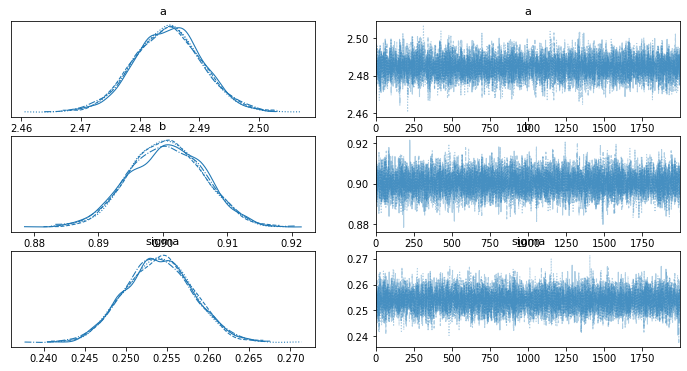

In [51]:
n = 2000
x = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 0.25, n)

y = 2.5 + 0.9 * x + epsilon

mean_a, mean_b, mean_sig, subsamp_a, subsamp_b = prob10_5(x, y)

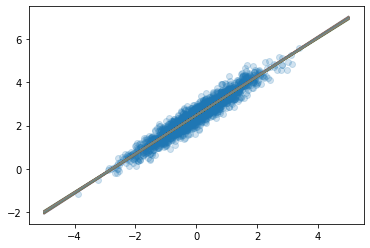

In [76]:
# part v
dom = np.linspace(-5,5,200)
plt.scatter(x, y, alpha=0.2)
plt.plot(dom, mean_b*dom +mean_a)
for b,a in zip(subsamp_b, subsamp_a):
    plt.plot(dom, b*dom + a, alpha=0.2)